<a href="https://colab.research.google.com/github/akshayreddy11/pyTorch/blob/main/Day3_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### PyTorch tensors & NumPy

NumPy is a popular scientific python numerical computing library

In [1]:
# NumPy array to tensor
import torch
import numpy as np
array = np.arange(1.0, 8.0)
tensor = torch.from_numpy(array)
array, tensor

(array([1., 2., 3., 4., 5., 6., 7.]),
 tensor([1., 2., 3., 4., 5., 6., 7.], dtype=torch.float64))

In [2]:
tensor = torch.ones(7)
numpy_tensor = tensor.numpy()
tensor, numpy_tensor

(tensor([1., 1., 1., 1., 1., 1., 1.]),
 array([1., 1., 1., 1., 1., 1., 1.], dtype=float32))

In [3]:
tensor = tensor + 1
tensor, numpy_tensor

(tensor([2., 2., 2., 2., 2., 2., 2.]),
 array([1., 1., 1., 1., 1., 1., 1.], dtype=float32))

### Reproducbility(trying to take random out of random

In [4]:
import torch
random_tensor_A = torch.rand(3, 4)
random_tensor_B = torch.rand(3, 4)
print(random_tensor_A)
print(random_tensor_B)
print(random_tensor_A == random_tensor_B)

tensor([[0.8767, 0.7098, 0.7962, 0.9016],
        [0.3134, 0.3562, 0.7223, 0.0680],
        [0.9916, 0.5735, 0.7422, 0.0094]])
tensor([[0.3235, 0.6265, 0.5160, 0.1103],
        [0.9446, 0.8722, 0.8768, 0.3812],
        [0.7663, 0.6677, 0.5662, 0.6795]])
tensor([[False, False, False, False],
        [False, False, False, False],
        [False, False, False, False]])


In [5]:
import torch
RANDOM_SEED = 42
torch.manual_seed(RANDOM_SEED)
random_tensor_C = torch.rand(3, 4)
random_tensor_D = torch.rand(3, 4)
print(random_tensor_C)
print(random_tensor_D)
print(random_tensor_C == random_tensor_D)


tensor([[0.8823, 0.9150, 0.3829, 0.9593],
        [0.3904, 0.6009, 0.2566, 0.7936],
        [0.9408, 0.1332, 0.9346, 0.5936]])
tensor([[0.8694, 0.5677, 0.7411, 0.4294],
        [0.8854, 0.5739, 0.2666, 0.6274],
        [0.2696, 0.4414, 0.2969, 0.8317]])
tensor([[False, False, False, False],
        [False, False, False, False],
        [False, False, False, False]])


 ### Running tensors and PyTorch objects on the GPUs

In [6]:
import torch
torch.cuda.is_available()

False

In [7]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [8]:
torch.cuda.device_count()

0

### Putting tensors (and models) on the GPU

In [9]:
tensor = torch.tensor([1, 2, 3])
print(tensor, tensor.device)

tensor([1, 2, 3]) cpu


In [10]:
tensor_on_gpu = tensor.to(device)
tensor_on_gpu


tensor([1, 2, 3])

### Moving tensors back to the CPU

In [11]:
tensor_back_on_cpu = tensor_on_gpu.cpu().numpy()
tensor_back_on_cpu

array([1, 2, 3])

In [12]:
tensor_on_gpu

tensor([1, 2, 3])

### PyTorch WorkFlow
 step1: data (prepare and load and build model

 step2: fitting the model to data and making predictions and evaluting a model

 step3: saving and loading a model and putting it all together

In [13]:
import torch
from torch import nn
import matplotlib.pyplot as plt
torch.__version__

'2.1.0+cu121'

## 1.data(preparing and loading)

In [14]:
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias
X[:10], y[:10], len(X), len(y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

In [15]:
len(X), len(y)

(50, 50)

## Splitting data into training and test sets

In [16]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [17]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  plt.figure(figsize=(10, 7))
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")
  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s=4, label= "Predictions")
    plt.legend(prop={"size": 14});


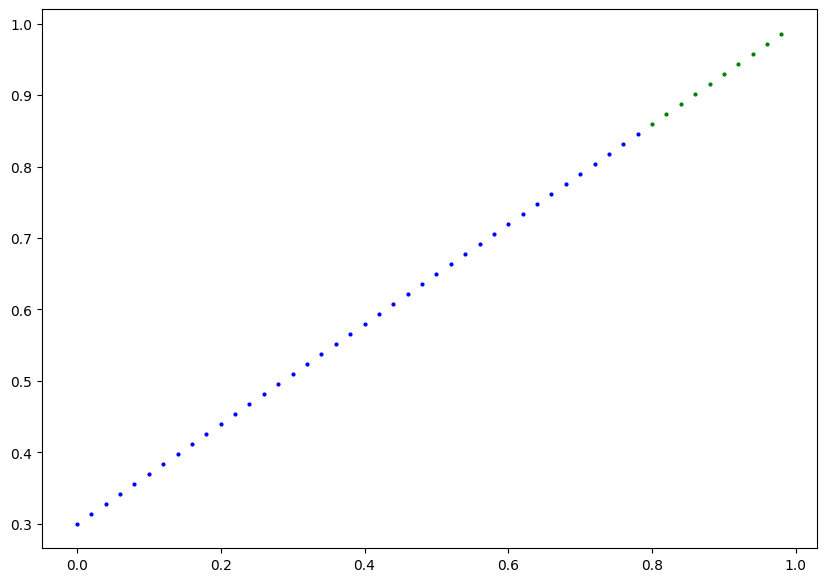

In [18]:
plot_predictions();

##2. Build Model

In [19]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                          requires_grad=True,
                                          dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                          requires_grad=True,
                                          dtype=torch.float))
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias

### Checking the contents of our PyTorch model

In [20]:
torch.manual_seed(42)
model_0 = LinearRegressionModel()
list(model_0.parameters())


[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [21]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

###Making prediction using torch.inference_mode()

In [22]:
with torch.inference_mode():
  y_preds = model_0(X_test)
  y_preds

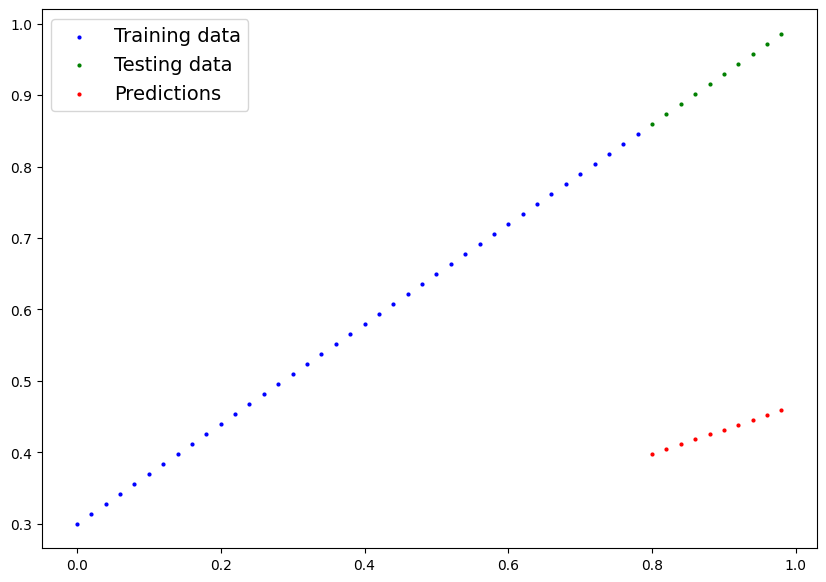

In [23]:
plot_predictions(predictions=y_preds)

###3.Train model

In [24]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [25]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [26]:
loss_fn= nn.L1Loss()
#setup an optimizer (stochastic gradient descent)
optimizer= torch.optim.SGD(params=model_0.parameters(),lr=0.01)

###Buliding a training loop(and testing loop) in PyTorch

In [27]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [29]:
X_test,y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [32]:
torch.manual_seed(42)
# epoch is one loop through the data..
epochs =200
epoch_count=[]
loss_values=[]
test_loss_values=[]
for epoch in range(epochs):
  # set the model to training mode
  model_0.train() # train mode in Pytorch Sets all parameters that require gradients to require gradients
  # 1.Forward pass
  y_pred=model_0(X_train)
  # calcuate the loss
  loss = loss_fn(y_pred,y_train)
  # 3. Optimizer zero grad
  optimizer.zero_grad()
  # 4. Perform backpropagation on the loss with respect to the parameters of the model
  loss.backward()
  # 5. Step the optimizer (perform gradient descenmt)
  optimizer.step()
  ### testing
  model_0.eval() #turns off gradient tracking
  with torch.inference_mode():
    test_pred=model_0(X_test)
    test_loss=loss_fn(test_pred,y_test)
  if epoch % 10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch: {epoch} | Loss:{loss} | Test loss:{test_loss}")

    print(model_0.state_dict())

Epoch: 0 | Loss:0.3013603389263153 | Test loss:0.4675942063331604
OrderedDict([('weights', tensor([0.3445])), ('bias', tensor([0.1488]))])
Epoch: 10 | Loss:0.18615034222602844 | Test loss:0.3328842222690582
OrderedDict([('weights', tensor([0.3835])), ('bias', tensor([0.2488]))])
Epoch: 20 | Loss:0.08227583020925522 | Test loss:0.2069590985774994
OrderedDict([('weights', tensor([0.4222])), ('bias', tensor([0.3403]))])
Epoch: 30 | Loss:0.05181945487856865 | Test loss:0.14023718237876892
OrderedDict([('weights', tensor([0.4539])), ('bias', tensor([0.3788]))])
Epoch: 40 | Loss:0.04503796249628067 | Test loss:0.11182951927185059
OrderedDict([('weights', tensor([0.4768])), ('bias', tensor([0.3868]))])
Epoch: 50 | Loss:0.04132963344454765 | Test loss:0.09809747338294983
OrderedDict([('weights', tensor([0.4956])), ('bias', tensor([0.3838]))])
Epoch: 60 | Loss:0.03785243630409241 | Test loss:0.08776430785655975
OrderedDict([('weights', tensor([0.5134])), ('bias', tensor([0.3783]))])
Epoch: 70 |

In [33]:
epoch_count, loss_values, test_loss_values

([0,
  10,
  20,
  30,
  40,
  50,
  60,
  70,
  80,
  90,
  100,
  110,
  120,
  130,
  140,
  150,
  160,
  170,
  180,
  190],
 [tensor(0.3014, grad_fn=<MeanBackward0>),
  tensor(0.1862, grad_fn=<MeanBackward0>),
  tensor(0.0823, grad_fn=<MeanBackward0>),
  tensor(0.0518, grad_fn=<MeanBackward0>),
  tensor(0.0450, grad_fn=<MeanBackward0>),
  tensor(0.0413, grad_fn=<MeanBackward0>),
  tensor(0.0379, grad_fn=<MeanBackward0>),
  tensor(0.0344, grad_fn=<MeanBackward0>),
  tensor(0.0310, grad_fn=<MeanBackward0>),
  tensor(0.0275, grad_fn=<MeanBackward0>),
  tensor(0.0241, grad_fn=<MeanBackward0>),
  tensor(0.0207, grad_fn=<MeanBackward0>),
  tensor(0.0172, grad_fn=<MeanBackward0>),
  tensor(0.0138, grad_fn=<MeanBackward0>),
  tensor(0.0104, grad_fn=<MeanBackward0>),
  tensor(0.0069, grad_fn=<MeanBackward0>),
  tensor(0.0035, grad_fn=<MeanBackward0>),
  tensor(0.0026, grad_fn=<MeanBackward0>),
  tensor(0.0026, grad_fn=<MeanBackward0>),
  tensor(0.0026, grad_fn=<MeanBackward0>)],
 [tensor(

In [34]:
import numpy as np
np.array(torch.tensor(loss_values).numpy()),test_loss_values

(array([0.30136034, 0.18615034, 0.08227583, 0.05181945, 0.04503796,
        0.04132963, 0.03785244, 0.03441364, 0.03097964, 0.02754883,
        0.02411001, 0.02067771, 0.0172452 , 0.0138064 , 0.01037578,
        0.00694158, 0.00350277, 0.00258851, 0.00258851, 0.00258851],
       dtype=float32),
 [tensor(0.4676),
  tensor(0.3329),
  tensor(0.2070),
  tensor(0.1402),
  tensor(0.1118),
  tensor(0.0981),
  tensor(0.0878),
  tensor(0.0795),
  tensor(0.0719),
  tensor(0.0636),
  tensor(0.0554),
  tensor(0.0478),
  tensor(0.0395),
  tensor(0.0312),
  tensor(0.0236),
  tensor(0.0154),
  tensor(0.0071),
  tensor(0.0084),
  tensor(0.0084),
  tensor(0.0084)])

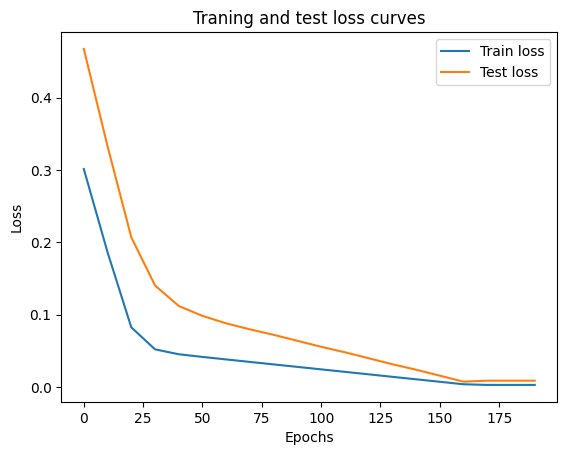

In [35]:
#plot the loss curves
plt.plot(epoch_count, np.array(torch.tensor(loss_values).cpu().numpy()),label="Train loss")
plt.plot(epoch_count,test_loss_values,label="Test loss")
plt.title("Traning and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [37]:
with torch.inference_mode():
  y_pred_new=model_0(X_test)

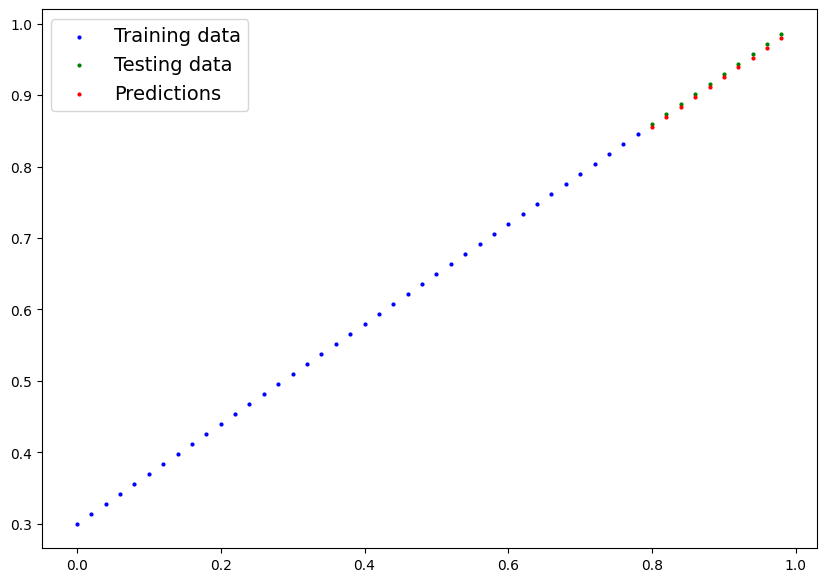

In [38]:
plot_predictions(predictions=y_pred_new)

In [39]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6951])), ('bias', tensor([0.2993]))])

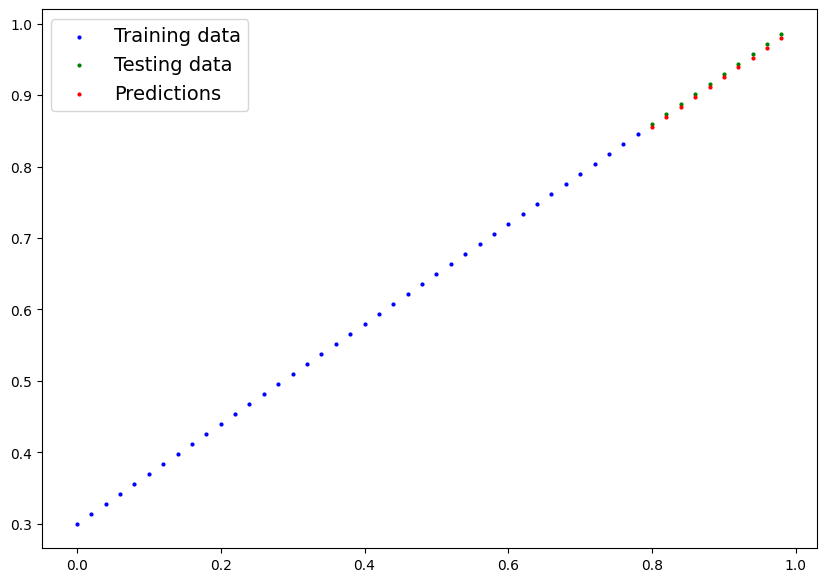

In [40]:
plot_predictions(predictions=y_pred_new)

### Saving a model in PyTorch

In [41]:
#saving our Pytorch model
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_0.pth


In [42]:
!ls -l models/01_pytorch_workflow_model_0.pth

-rw-r--r-- 1 root root 1680 Feb 14 16:17 models/01_pytorch_workflow_model_0.pth


In [43]:
# To load in saved state_dict we have to instantiate a new instance of our model
loaded_model_0 = LinearRegressionModel()

# Load the state_dict of our saved model (this will update the new instance of our model with trained weights)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [44]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6951])), ('bias', tensor([0.2993]))])

In [46]:
loaded_model_0.eval()
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test)
loaded_model_preds

tensor([[0.8554],
        [0.8693],
        [0.8832],
        [0.8971],
        [0.9110],
        [0.9249],
        [0.9388],
        [0.9527],
        [0.9666],
        [0.9805]])

In [47]:
y_pred_new == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

In [49]:
#Make some models preds
model_0.eval()
with torch.inference_mode():
  y_preds = model_0(X_test)
y_preds

tensor([[0.8554],
        [0.8693],
        [0.8832],
        [0.8971],
        [0.9110],
        [0.9249],
        [0.9388],
        [0.9527],
        [0.9666],
        [0.9805]])

In [50]:
# Import PyTorch and matplotlib
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.1.0+cu121'

In [51]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cpu


In [52]:
# Create weight and bias
weight = 0.7
bias = 0.3

# Create range values
start = 0
end = 1
step = 0.02

# Create X and y (features and labels)
X = torch.arange(start, end, step).unsqueeze(dim=1) # without unsqueeze, errors will happen later on (shapes within linear layers)
y = weight * X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [53]:
# Split data
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

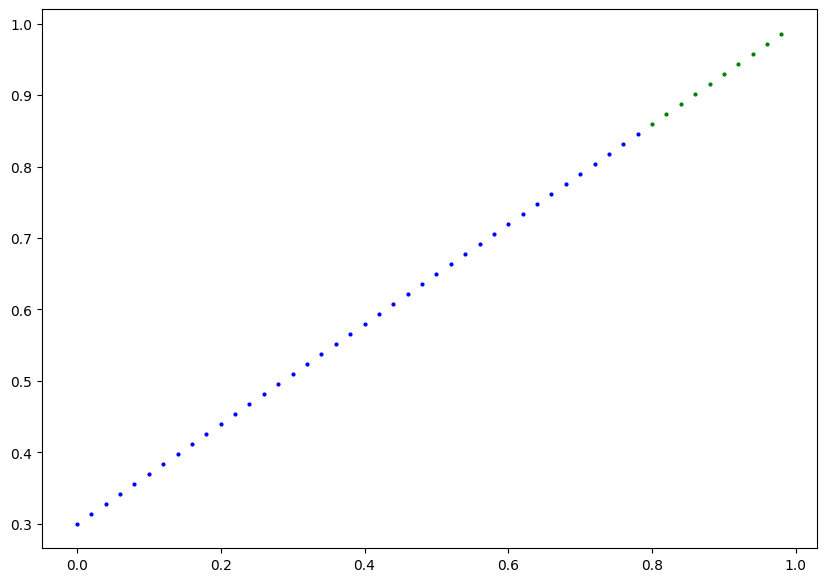

In [54]:
plot_predictions(X_train, y_train, X_test, y_test)

###Building a PyTorch linear model

In [55]:
# create a linear model by Subclassing nn.Module
class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        # Use nn.Linear() for creating the model parameters
        self.linear_layer = nn.Linear(in_features=1,
                                      out_features=1)


    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)

# Set the manual seed when
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()


(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [56]:
next(model_1.parameters()).device

device(type='cpu')

In [57]:
model_1.to(device)
next(model_1.parameters()).device

device(type='cpu')

In [58]:
loss_fn = nn.L1Loss()

# Create optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(), # optimize newly created model's parameters
                            lr=0.01)

In [59]:
#lets write a training loop
torch.manual_seed(42)


epochs =  200

# Put data on the available device
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
    ### Training
    model_1.train() # train mode is on by default after construction

    # 1. Forward pass
    y_pred = model_1(X_train)

    # 2. Calculate loss
    loss = loss_fn(y_pred, y_train)

    # 3. Zero grad optimizer
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Step the optimizer
    optimizer.step()

    ### Testing
    model_1.eval() # put the model in evaluation mode for testing (inference)
    # 1. Forward pass
    with torch.inference_mode():
        test_pred = model_1(X_test)

        # 2. Calculate the loss
        test_loss = loss_fn(test_pred, y_test)

    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Train loss: {loss} | Test loss: {test_loss}")

Epoch: 0 | Train loss: 0.5551779866218567 | Test loss: 0.5739762187004089
Epoch: 10 | Train loss: 0.4399680495262146 | Test loss: 0.4392663538455963
Epoch: 20 | Train loss: 0.3247582018375397 | Test loss: 0.30455657839775085
Epoch: 30 | Train loss: 0.20954827964305878 | Test loss: 0.16984674334526062
Epoch: 40 | Train loss: 0.09433844685554504 | Test loss: 0.03513689711689949
Epoch: 50 | Train loss: 0.023886386305093765 | Test loss: 0.04784906655550003
Epoch: 60 | Train loss: 0.0199567973613739 | Test loss: 0.04580312222242355
Epoch: 70 | Train loss: 0.016517987474799156 | Test loss: 0.0375305712223053
Epoch: 80 | Train loss: 0.013089170679450035 | Test loss: 0.029944902285933495
Epoch: 90 | Train loss: 0.009653178043663502 | Test loss: 0.02167237363755703
Epoch: 100 | Train loss: 0.006215679459273815 | Test loss: 0.014086711220443249
Epoch: 110 | Train loss: 0.002787243574857712 | Test loss: 0.005814164876937866
Epoch: 120 | Train loss: 0.0012645035749301314 | Test loss: 0.01380180753

In [60]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

In [61]:
weight,bias

(0.7, 0.3)

In [63]:
model_1.eval()
#make predictions on the test data
with torch.inference_mode():
  y_preds=model_1(X_test)
y_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]])

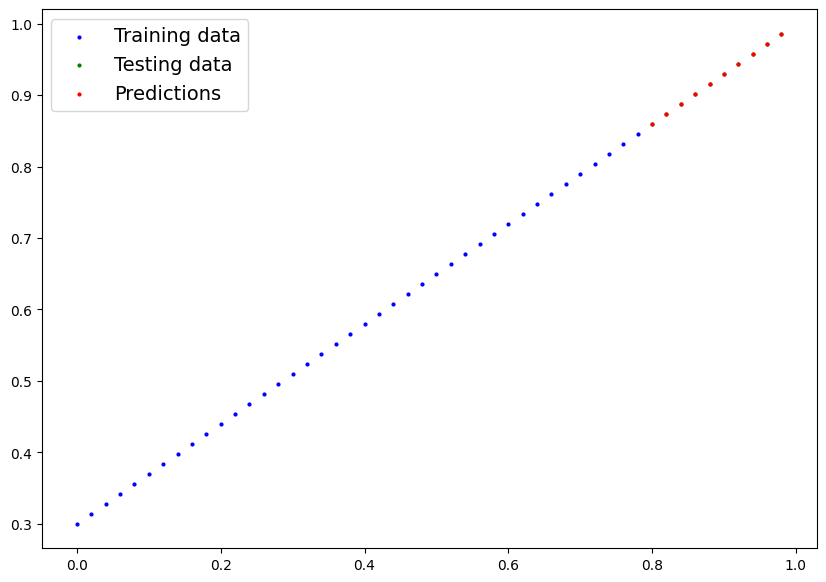

In [64]:
#check out our model predictions visually
plot_predictions(predictions=y_preds.cpu())

In [65]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_1.pth


In [66]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

In [67]:
#load a PyTorch model
# create a new instance of LinearRegressionModelV2
loaded_model_1 = LinearRegressionModelV2()

# Load model state dict
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

# Put model to target device (if your data is on GPU, model will have to be on GPU to make predictions)
loaded_model_1.to(device)

print(f"Loaded model:\n{loaded_model_1}")
print(f"Model on device:\n{next(loaded_model_1.parameters()).device}")

Loaded model:
LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)
Model on device:
cpu


In [68]:
next(loaded_model_1.parameters()).device

device(type='cpu')

In [69]:
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

In [70]:
# Evaluate loaded model
loaded_model_1.eval()
with torch.inference_mode():
    loaded_model_1_preds = loaded_model_1(X_test)
y_preds == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])